In [33]:
%matplotlib inline

import pylab
import scipy
from astropy.io import fits
import scipy.fftpack as pf
import pywt
import os
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt #plot library
def init_plotting():
    plt.rcParams['figure.figsize'] = (14.0,8.0)
    plt.rcParams['font.size'] = 10
    #plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 2*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 1

init_plotting()

In [34]:
hdulist = fits.open('MESSIER_094.fits')

hdulist.info()

Filename: MESSIER_094.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     104   (494, 494)   int16   


In [35]:
hdulist[0].header

SIMPLE  =                    T /FITS header                                     
BITPIX  =                   16 /No.Bits per pixel                               
NAXIS   =                    2 /No.dimensions                                   
NAXIS1  =                  494 /Length X axis                                   
NAXIS2  =                  494 /Length Y axis                                   
DATE    = '08/11/17          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'E115              ' /Observatory plate label                         
PLATEID = '082U              ' /GSSS Plate ID                                   
REGION  = 'XE217             ' /GSSS Region Name                                
DATE-OBS= '16/05/50          ' /UT date of Observation                          
UT      = '05:03:00.00       ' /UT time of observation                          
EPOCH   =  1.9503704833984E+

In [45]:
im, hdr = fits.getdata('MESSIER_094.fits', header=True)
im = np.array(im,dtype='Float64')
tam = np.shape(im)

/home/natalia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


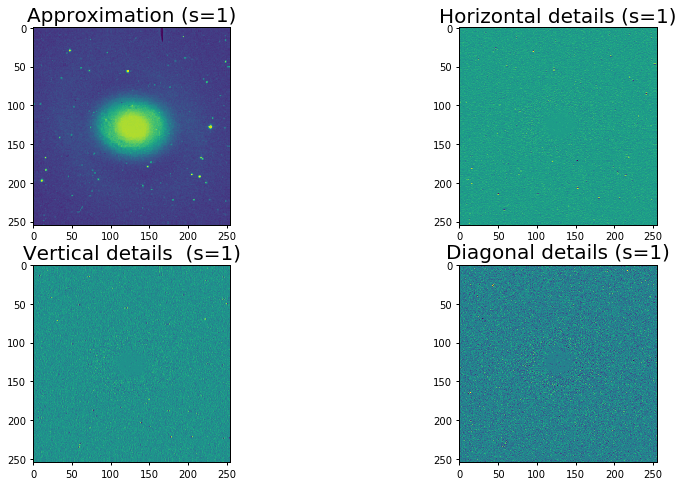

In [73]:
wav = 'coif3'
ext = 'sym'
(media,(Hdet,Vdet,Ddet)) = pywt.dwt2(im,wav,mode=ext)
pylab.figure(2)
pylab.subplot(2,2,1)
pylab.imshow(media)
pylab.title('Approximation (s=1)')
pylab.subplot(2,2,2)
pylab.imshow(Hdet)
pylab.title('Horizontal details (s=1)')
pylab.subplot(2,2,3)
pylab.imshow(Vdet)
pylab.title('Vertical details  (s=1)')
pylab.subplot(2,2,4)
pylab.imshow(Ddet)
pylab.title('Diagonal details (s=1)')

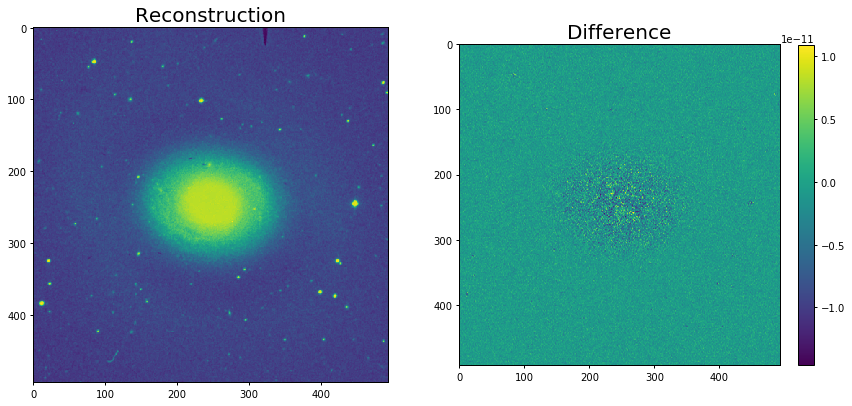

In [74]:
# Inverse Discrete Wavelet Transform at scale 1

imrec = pywt.idwt2((media,(Hdet,Vdet,Ddet)),wav,mode=ext)
pylab.figure(3)
pylab.subplot(1,2,1)
pylab.imshow(imrec)
pylab.title('Reconstruction')
pylab.subplot(1,2,2)
pylab.imshow(im-imrec)
pylab.colorbar(fraction=0.045)
pylab.title('Difference')

In [75]:
# Multiscale DWT

wav = 'coif3'
escalas = pywt.dwt_max_level(min(tam),pywt.Wavelet(wav).dec_len)
escalas = 3
decomp = pywt.wavedec2(im,wav,level=escalas)

([], <a list of 0 Text yticklabel objects>)

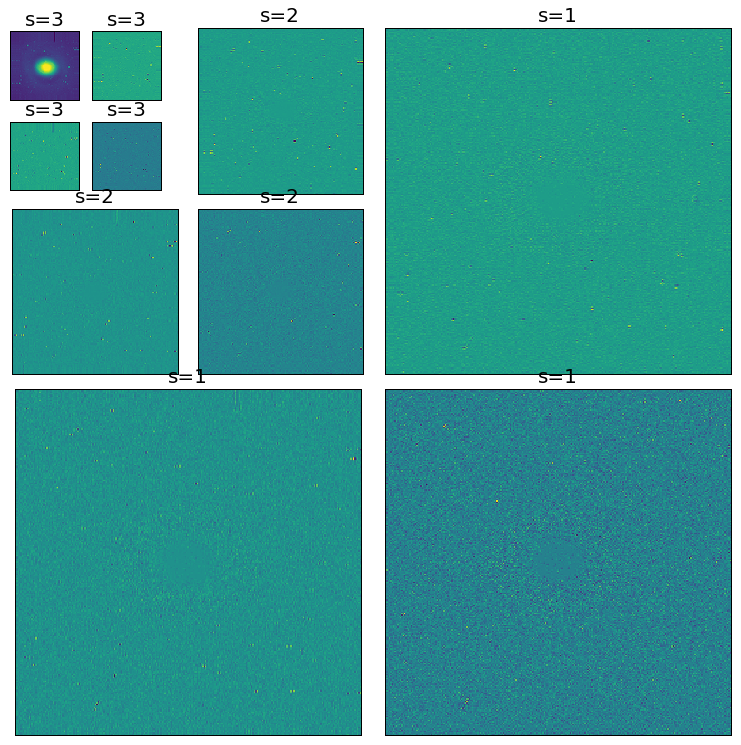

In [76]:
pylab.figure(4,figsize=(13,13))
pylab.subplot2grid((2**escalas,2**escalas+1),(0,0))
pylab.imshow(decomp[0],aspect='equal')
pylab.xticks([])
pylab.yticks([])
pylab.title('s='+str(escalas))
pylab.subplot2grid((2**escalas,2**escalas+1),(0,1))
pylab.imshow(decomp[1][0],aspect='equal')
pylab.xticks([])
pylab.yticks([])
pylab.title('s='+str(escalas))
pylab.subplot2grid((2**escalas,2**escalas+1),(1,0))
pylab.imshow(decomp[1][1],aspect='equal')
pylab.xticks([])
pylab.yticks([])
pylab.title('s='+str(escalas))
pylab.subplot2grid((2**escalas,2**escalas+1),(1,1))
pylab.imshow(decomp[1][2],aspect='equal')
pylab.xticks([])
pylab.yticks([])
pylab.title('s='+str(escalas))
for i in range(2,escalas+1):
    pylab.subplot2grid((2**escalas,2**escalas),(0,2*(i-1)),colspan=2**(i-1),rowspan=2**(i-1))
    pylab.imshow(decomp[i][0],aspect='equal')
    pylab.xticks([])
    pylab.yticks([])
    pylab.title('s='+str(escalas+1-i))
    pylab.subplot2grid((2**escalas,2**escalas),(2*(i-1),0),colspan=2**(i-1),rowspan=2**(i-1))
    pylab.imshow(decomp[i][1],aspect='equal')
    pylab.xticks([])
    pylab.yticks([])
    pylab.title('s='+str(escalas+1-i))
    pylab.subplot2grid((2**escalas,2**escalas),(2*(i-1),2*(i-1)),colspan=2**(i-1),rowspan=2**(i-1))
    pylab.imshow(decomp[i][2],aspect='equal')
    pylab.xticks([])
    pylab.yticks([])
    pylab.title('s='+str(escalas+1-i))

pylab.xticks([])
pylab.yticks([])

826.832907903 165.998103993


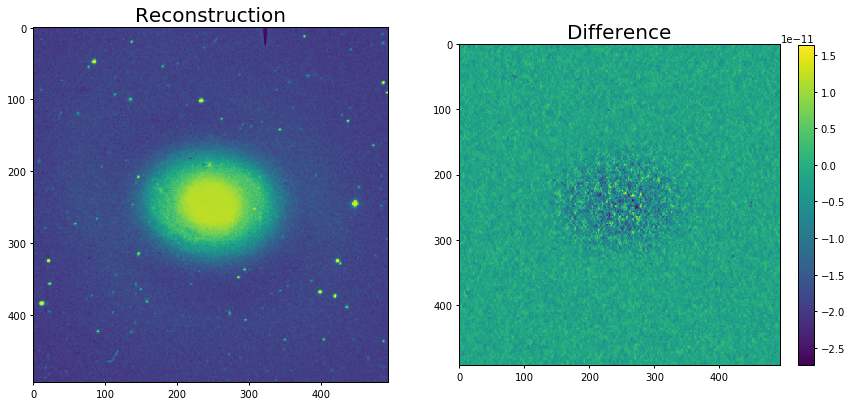

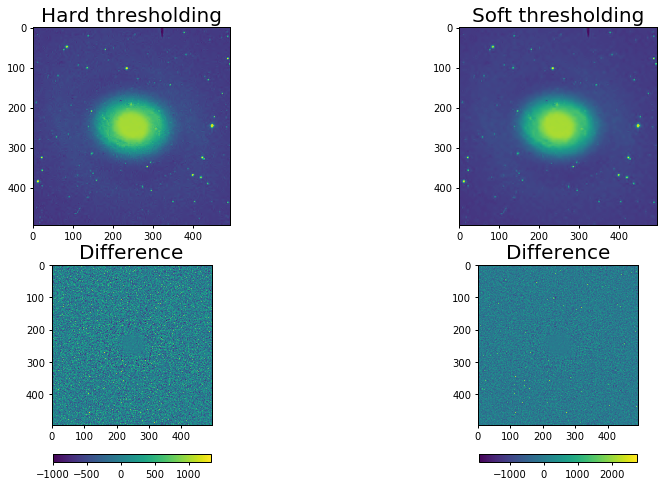

In [77]:
# Multiscale inverse DWT

imrec = pywt.waverec2(decomp,wav)
pylab.figure(5)
pylab.subplot(1,2,1)
pylab.imshow(imrec)
pylab.title('Reconstruction')
pylab.subplot(1,2,2)
pylab.imshow(im-imrec)
pylab.colorbar(fraction=0.045)
pylab.title('Difference')


###############################################################################################
###############################################################################################
# Filtering

#### Calculate the universal threshold
det1 = scipy.c_[decomp[-1][:]]
sigma = scipy.median(abs(det1))/0.6745
thresh = sigma*scipy.sqrt(2*scipy.log(scipy.size(im)))
print(thresh,sigma)
###

decompclean = []
decompclean.append(decomp[0])
for i in range(1,len(decomp)):
    decompclean.append(pywt.threshold(decomp[i][:],thresh,'hard'))
imclean = pywt.waverec2(decompclean,wav)
pylab.figure(6)
pylab.subplot(2,2,1)
pylab.imshow(imclean)
pylab.title('Hard thresholding')
pylab.subplot(2,2,3)
pylab.imshow(im-imclean)
pylab.title('Difference')
pylab.colorbar(orientation='horizontal',fraction=0.04)
decompclean = []
decompclean.append(decomp[0])
for i in range(1,len(decomp)):
    decompclean.append(pywt.threshold(decomp[i][:],thresh,'soft'))
imclean = pywt.waverec2(decompclean,wav)
pylab.subplot(2,2,2)
pylab.imshow(imclean)
pylab.title('Soft thresholding')
pylab.subplot(2,2,4)
pylab.imshow(im-imclean)
pylab.title('Difference')
pylab.colorbar(orientation='horizontal',fraction=0.04)

In [57]:
outfile = 'M94.fits'

hdu = fits.PrimaryHDU() #criando o HDU 
hdu.data = imclean

In [58]:
hdu.header #header básico o qual iremos salvar a primeira versão de imagem

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  494                                                  
NAXIS2  =                  494                                                  
EXTEND  =                    T                                                  

In [59]:
hdu.writeto(outfile+'_clean')

In [60]:
hdu.header = hdr

In [61]:
hdu.header

SIMPLE  =                    T /FITS header                                     
BITPIX  =                  -64 / No.Bits per pixel                              
NAXIS   =                    2 /No.dimensions                                   
NAXIS1  =                  494 /Length X axis                                   
NAXIS2  =                  494 /Length Y axis                                   
DATE    = '08/11/17          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'E115              ' /Observatory plate label                         
PLATEID = '082U              ' /GSSS Plate ID                                   
REGION  = 'XE217             ' /GSSS Region Name                                
DATE-OBS= '16/05/50          ' /UT date of Observation                          
UT      = '05:03:00.00       ' /UT time of observation                          
EPOCH   =  1.9503704833984E+